<a href="https://colab.research.google.com/github/tejalkothawade/Group-12.Spectral-Decomposition-Theorem/blob/main/ONION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15,20]
import itertools

In [ ]:
df=pd.read_csv("Onion.csv")
df.head()

,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Red,300,1891,1350,01-Jan-10
1,Red,300,1700,1300,04-Jan-10
2,Red,100,1681,1100,05-Jan-10
3,Red,100,1750,1500,06-Jan-10
4,Red,100,1565,1250,11-Jan-10


In [ ]:
df. rename(columns = {'Min Price (Rs./Quintal)':'min_price', 'Max Price (Rs./Quintal)':'max_price','Modal Price (Rs./Quintal)':'modal_price','Price Date':'arrival_date'}, inplace = True)
df.head()

,Variety,min_price,max_price,modal_price,arrival_date
0,Red,300,1891,1350,01-Jan-10
1,Red,300,1700,1300,04-Jan-10
2,Red,100,1681,1100,05-Jan-10
3,Red,100,1750,1500,06-Jan-10
4,Red,100,1565,1250,11-Jan-10


In [ ]:
df.shape

(1181, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Variety       1181 non-null   object
 1   min_price     1181 non-null   int64 
 2   max_price     1181 non-null   int64 
 3   modal_price   1181 non-null   int64 
 4   arrival_date  1181 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.3+ KB


In [ ]:
df.arrival_date = pd.DatetimeIndex(df.arrival_date)
df.dtypes
df.head()

,Variety,min_price,max_price,modal_price,arrival_date
0,Red,300,1891,1350,2010-01-01
1,Red,300,1700,1300,2010-01-04
2,Red,100,1681,1100,2010-01-05
3,Red,100,1750,1500,2010-01-06
4,Red,100,1565,1250,2010-01-11


In [ ]:
df.set_index('arrival_date',inplace=True)
df.head()

,Variety,min_price,max_price,modal_price
arrival_date,,,,
2010-01-01,Red,300,1891,1350
2010-01-04,Red,300,1700,1300
2010-01-05,Red,100,1681,1100
2010-01-06,Red,100,1750,1500
2010-01-11,Red,100,1565,1250


In [ ]:
df = df.sort_values(by="arrival_date")
df.head()

,Variety,min_price,max_price,modal_price
arrival_date,,,,
2010-01-01,Red,300,1891,1350
2010-01-04,Red,300,1700,1300
2010-01-05,Red,100,1681,1100
2010-01-06,Red,100,1750,1500
2010-01-11,Red,100,1565,1250


In [ ]:
pd.set_option("precision", 0)
df.describe()

,min_price,max_price,modal_price
count,1181,1181,1181
mean,730,1975,1657
std,563,1464,1212
min,50,366,225
25%,350,936,775
50%,600,1500,1300
75%,1000,2606,2200
max,5011,10000,8200


In [ ]:
df.index

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-18',
               '2010-01-19', '2010-02-02',
               ...
               '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-07',
               '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
               '2022-03-14', '2022-03-15'],
              dtype='datetime64[ns]', name='arrival_date', length=1181, freq=None)

In [ ]:
df_modal=df.drop(["min_price","max_price","Variety"],axis=1)
df_modal.head()

,modal_price
arrival_date,
2010-01-01,1350
2010-01-04,1300
2010-01-05,1100
2010-01-06,1500
2010-01-11,1250


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

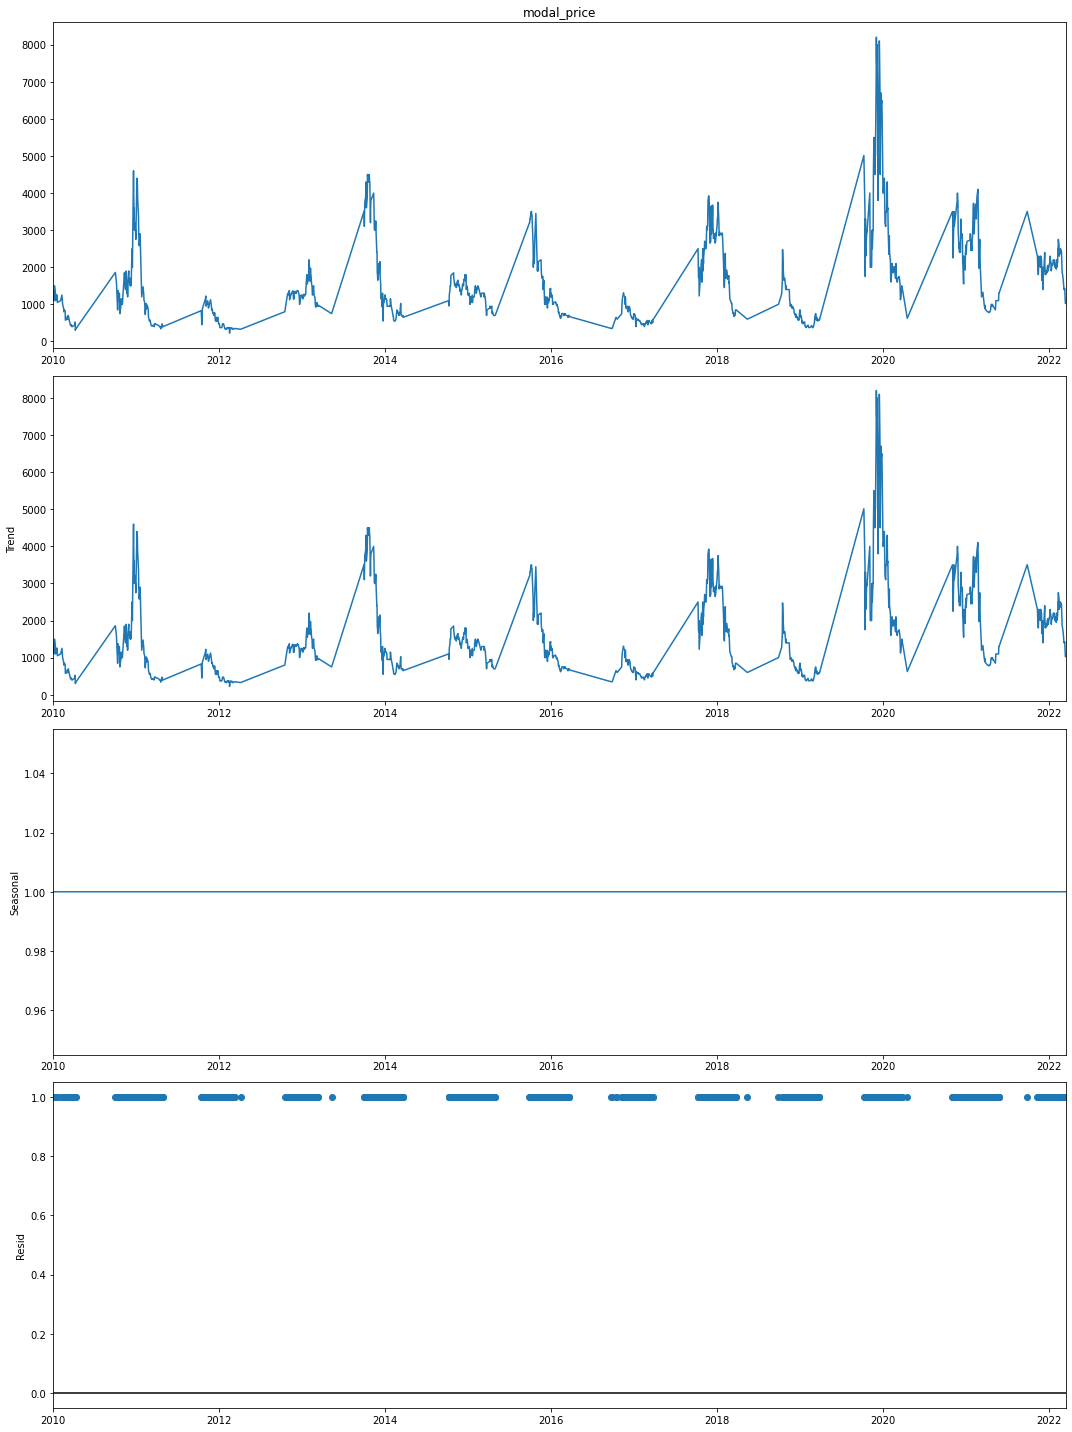

In [ ]:
decompose_result = seasonal_decompose(df_modal['modal_price'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

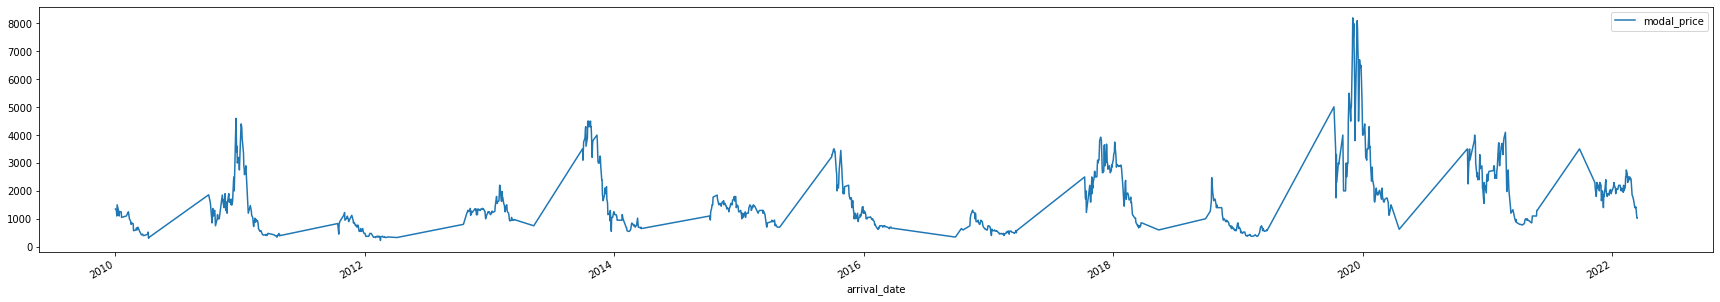

In [ ]:
df_modal.plot(kind="line", y=["modal_price"],figsize=[30,5])
plt.show()

<AxesSubplot:ylabel='Frequency'>

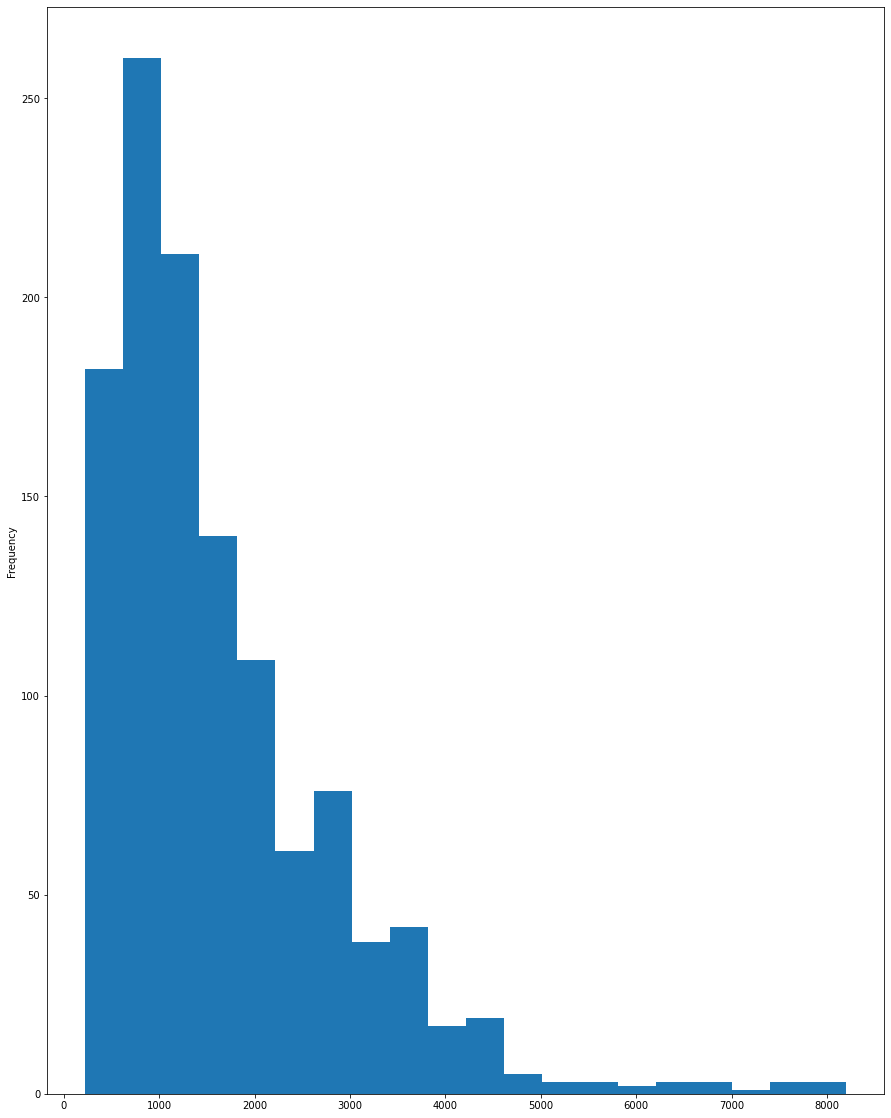

In [ ]:
df_modal.modal_price.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

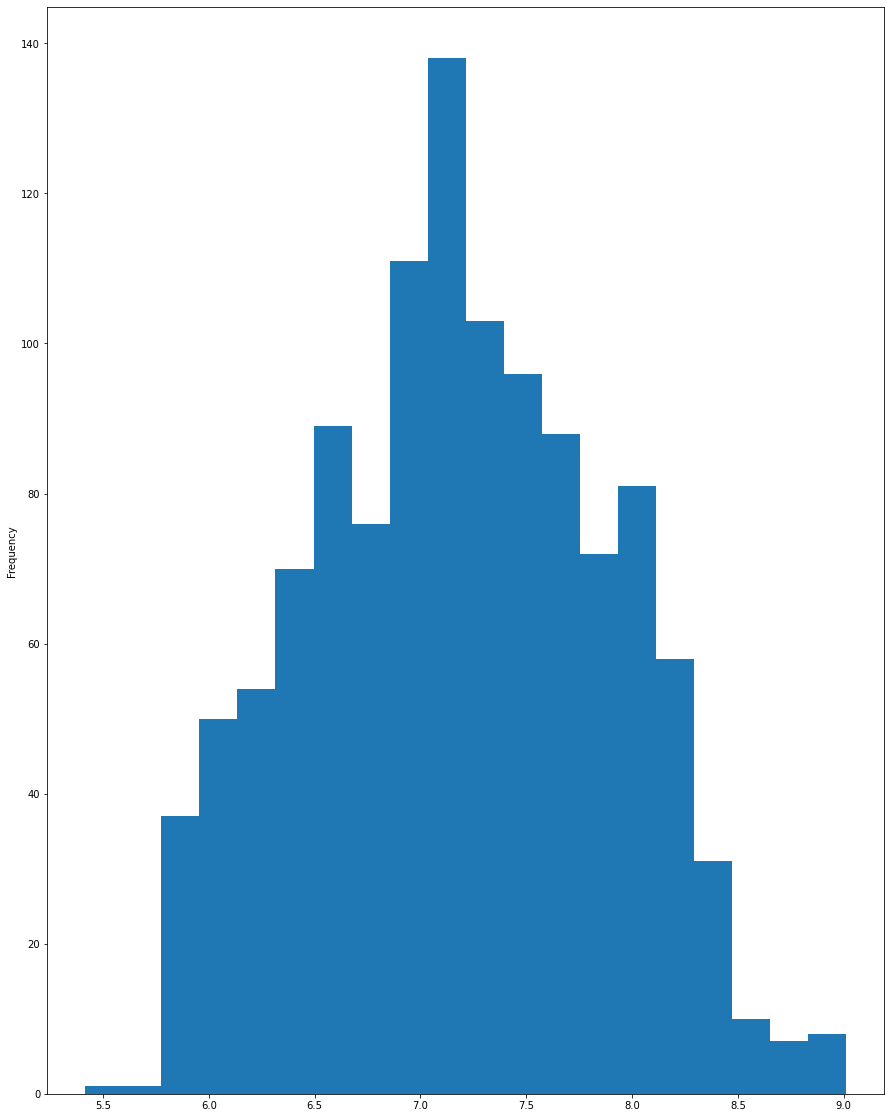

In [ ]:
df_modal["log_modal_price"] = np.log(df_modal.modal_price)
df_modal.log_modal_price.plot(kind="hist", bins=20)


<AxesSubplot:xlabel='arrival_date'>

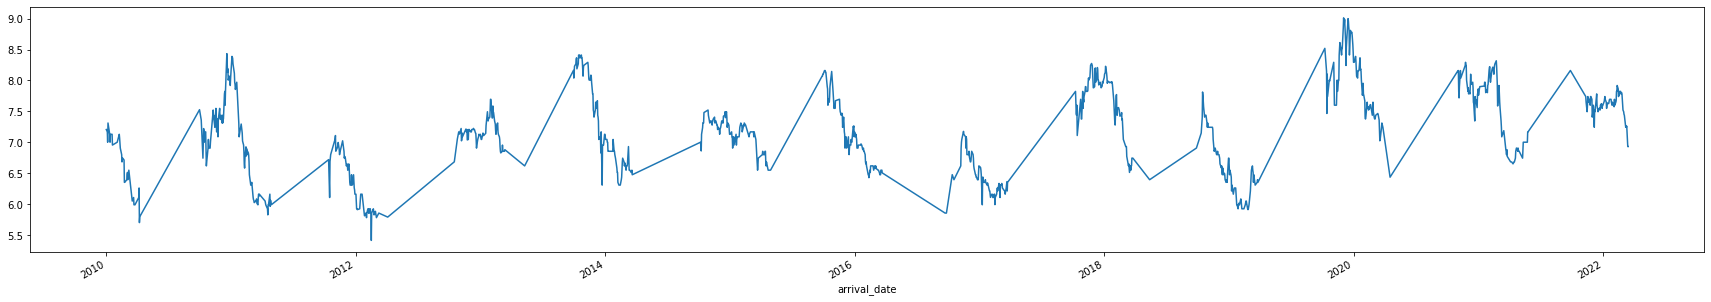

In [ ]:
df_modal.log_modal_price.plot(figsize=[30,5])

In [ ]:
x=df_modal.index.copy()

In [ ]:
df_modal.date = x

<ipython-input-32-9fdd16c50544>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_modal.date = x


In [ ]:
df_modal

,modal_price,log_modal_price
arrival_date,,
2010-01-01,1350,7
2010-01-04,1300,7
2010-01-05,1100,7
2010-01-06,1500,7
2010-01-11,1250,7
...,...,...
2022-03-09,1425,7
2022-03-10,1400,7
2022-03-11,1425,7


In [ ]:
df_modal["timeindex"] = df_modal.date - df_modal.date.min()
df_modal.head()

,modal_price,log_modal_price,timeindex
arrival_date,,,
2010-01-01,1350,7,0 days
2010-01-04,1300,7,3 days
2010-01-05,1100,7,4 days
2010-01-06,1500,7,5 days
2010-01-11,1250,7,10 days


In [ ]:
df_modal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1181 entries, 2010-01-01 to 2022-03-15
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   modal_price      1181 non-null   int64          
 1   log_modal_price  1181 non-null   float64        
 2   timeindex        1181 non-null   timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 69.2 KB


In [ ]:
df_modal["timeindex"] = df_modal["timeindex"]/np.timedelta64(1,"D")
df_modal.head()

,modal_price,log_modal_price,timeindex
arrival_date,,,
2010-01-01,1350,7,0
2010-01-04,1300,7,3
2010-01-05,1100,7,4
2010-01-06,1500,7,5
2010-01-11,1250,7,10


In [ ]:
df_modal["timeindex"] = df_modal["timeindex"].round(0).astype(int)
df_modal

,modal_price,log_modal_price,timeindex
arrival_date,,,
2010-01-01,1350,7,0
2010-01-04,1300,7,3
2010-01-05,1100,7,4
2010-01-06,1500,7,5
2010-01-11,1250,7,10
...,...,...,...
2022-03-09,1425,7,4450
2022-03-10,1400,7,4451
2022-03-11,1425,7,4452


In [ ]:
import statsmodels.formula.api as smf
linear_model = smf.ols('log_modal_price ~ timeindex', data = df_modal).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_modal_price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     158.7
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           3.20e-34
Time:                        14:55:20   Log-Likelihood:                -1159.2
No. Observations:                1181   AIC:                             2322.
Df Residuals:                    1179   BIC:                             2332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7571      0.038    176.178      0.000       6.682       6.832
timeindex      0.0002   1.45e-05     12.596      0.000       0.000       0.000
==============================================================================
Omnibus:                       15.790   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.816
Skew:                           0.024   Prob(JB):                      0.00739
Kurtosis:                       2.556   Cond. No.                     5.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.75709525, 6.75764366, 6.75782646, ..., 7.57093135, 7.57147975,
       7.57166256])

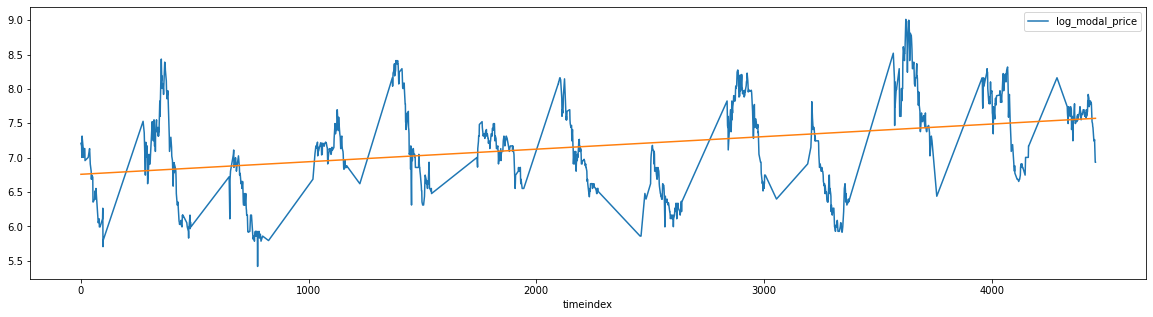

In [ ]:
df_modal.plot(kind = "line", x="timeindex", y="log_modal_price", figsize=[20,5])
plt.plot(df_modal.timeindex, linear_model_pred)


<AxesSubplot:xlabel='arrival_date'>

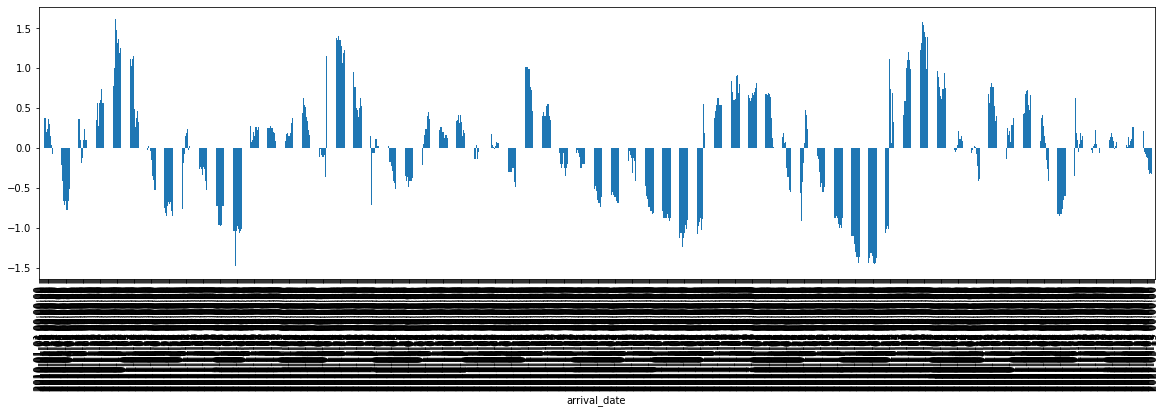

In [ ]:
linear_model.resid.plot(kind="bar", figsize=[20,5])

In [ ]:
df_modal["linear_price"] = np.exp(linear_model_pred)
df_modal.head()

,modal_price,log_modal_price,timeindex,linear_price
arrival_date,,,,
2010-01-01,1350,7,0,860
2010-01-04,1300,7,3,861
2010-01-05,1100,7,4,861
2010-01-06,1500,7,5,861
2010-01-11,1250,7,10,862


In [ ]:
df_modal_dummy= df_modal.set_index('timeindex')
df_modal_dummy.head()

,modal_price,log_modal_price,linear_price
timeindex,,,
0,1350,7,860
3,1300,7,861
4,1100,7,861
5,1500,7,861
10,1250,7,862


<AxesSubplot:xlabel='timeindex'>

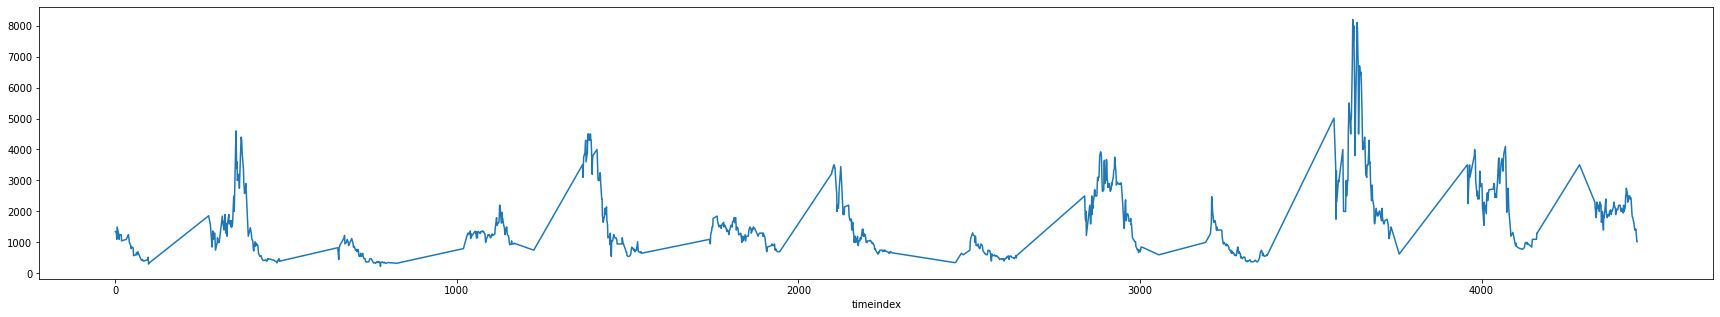

In [ ]:
df_modal_dummy.modal_price.plot(figsize=[30,5])

<AxesSubplot:xlabel='timeindex'>

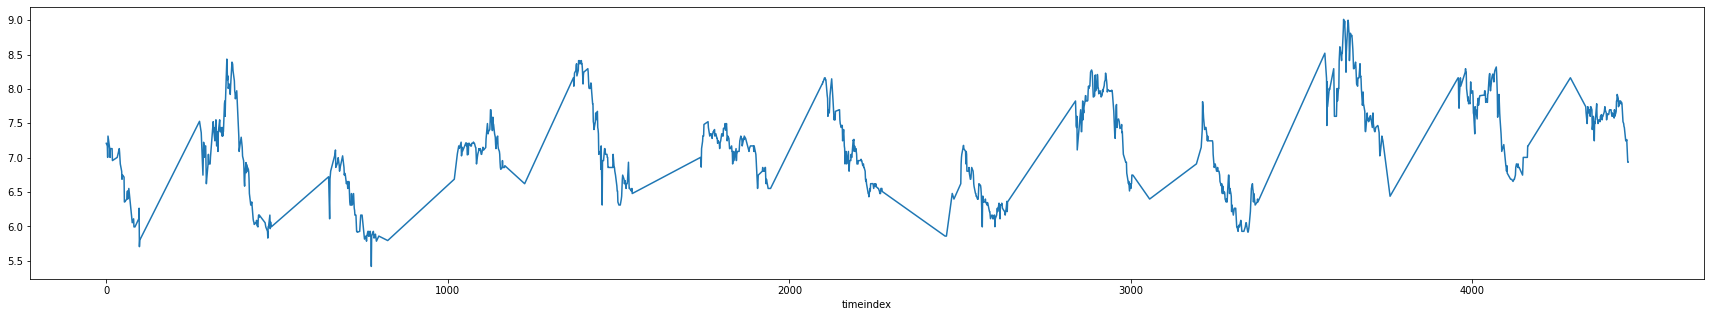

In [ ]:
df_modal_dummy.log_modal_price.plot(figsize=[30,5])

In [ ]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [ ]:
linear_model_RMSE = RMSE(df_modal.modal_price, df_modal.linear_price)
linear_model_RMSE

1186.850402492784

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_modal['modal_price'])


ADF Statistics: -4.2649233272042535
p- value: 0.0005106166615562816
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


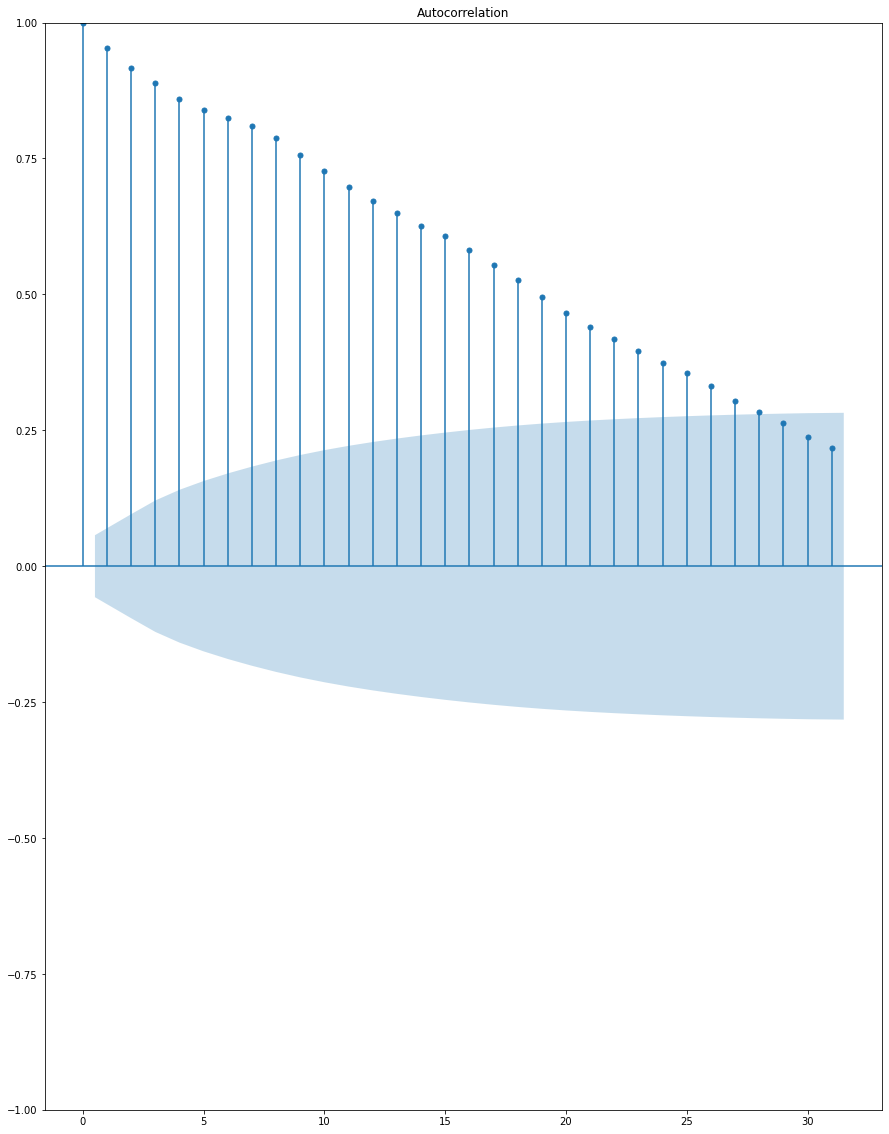

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df_modal["modal_price"].dropna())

c:\python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


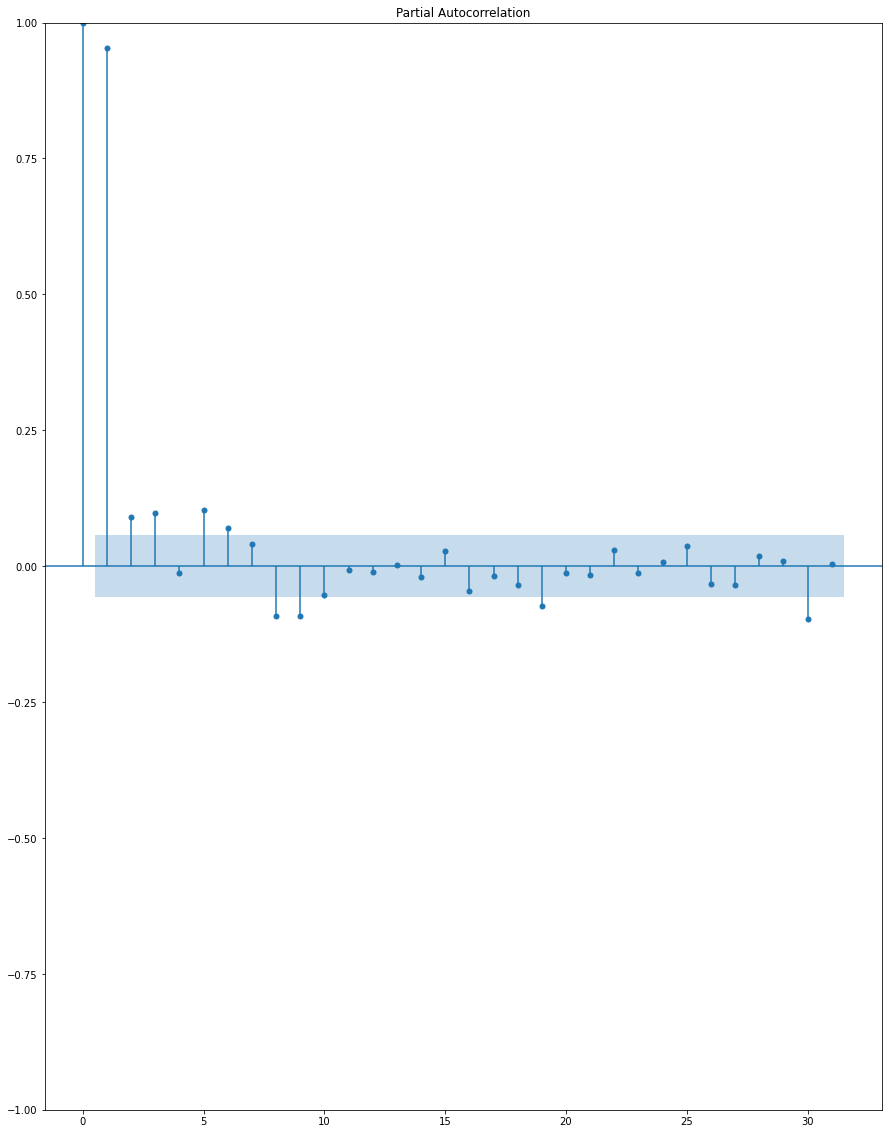

In [ ]:
pacf = plot_pacf(df_modal["modal_price"].dropna())

In [ ]:
adf_test(df_modal['log_modal_price'])

ADF Statistics: -3.7303185050956587
p- value: 0.003706353728721109
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


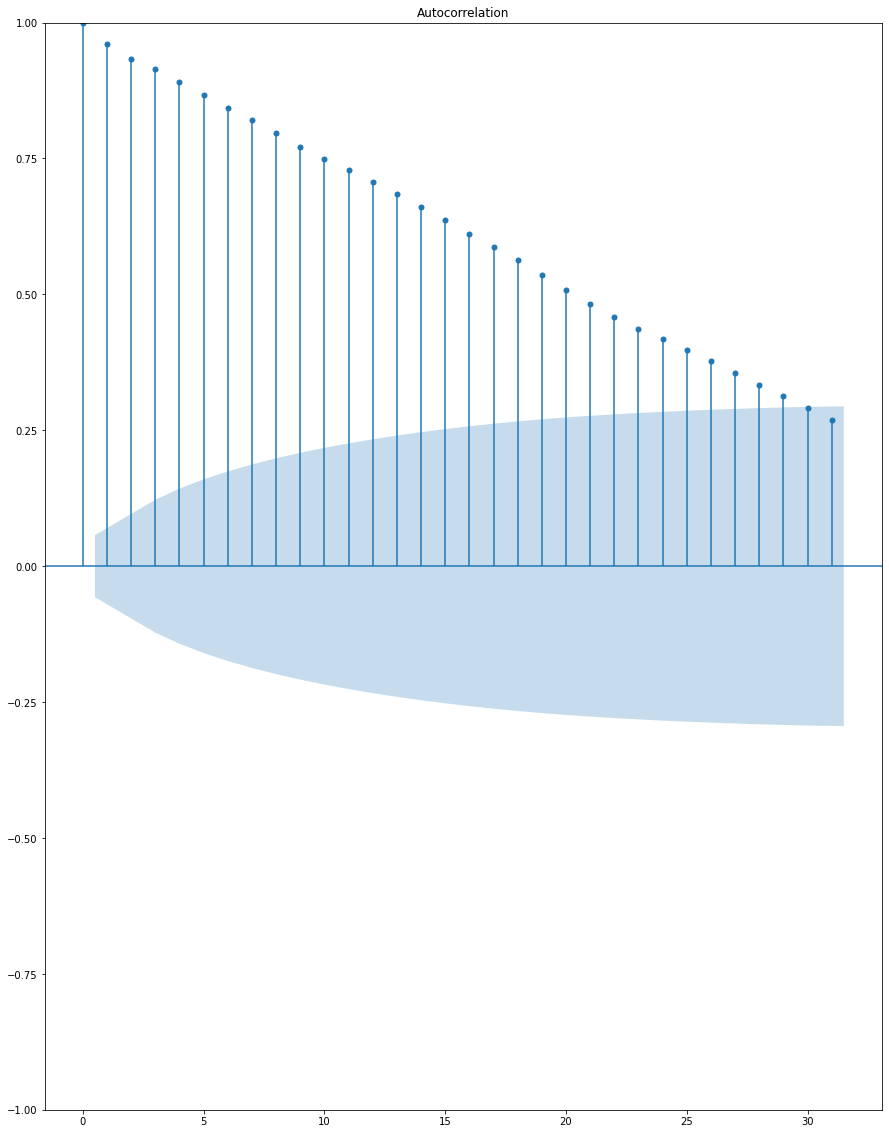

In [ ]:
acf = plot_acf(df_modal["log_modal_price"].dropna())

c:\python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


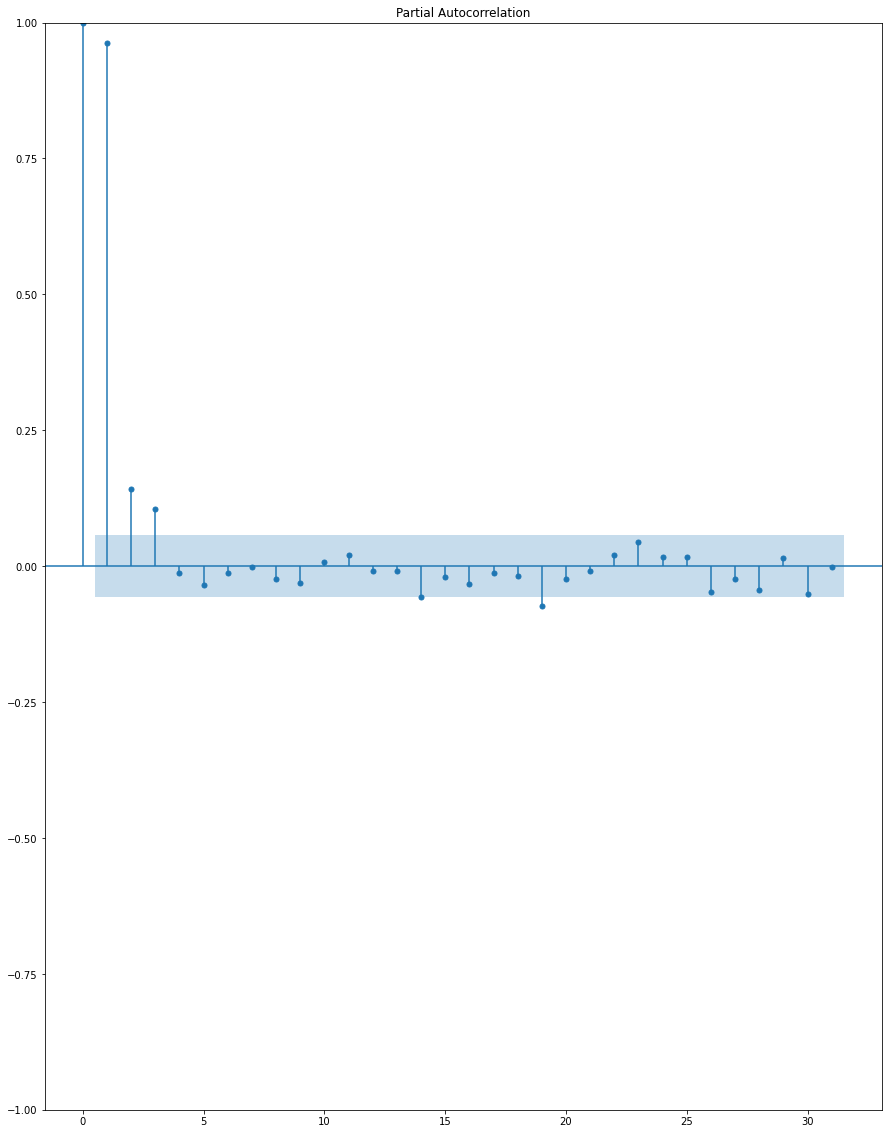

In [ ]:
pacf = plot_pacf(df_modal["log_modal_price"].dropna())

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
x = 12
alpha = 1/(2*x)

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters graph: Additive Trend and Multiplicative Trend'}, xlabel='arrival_date'>

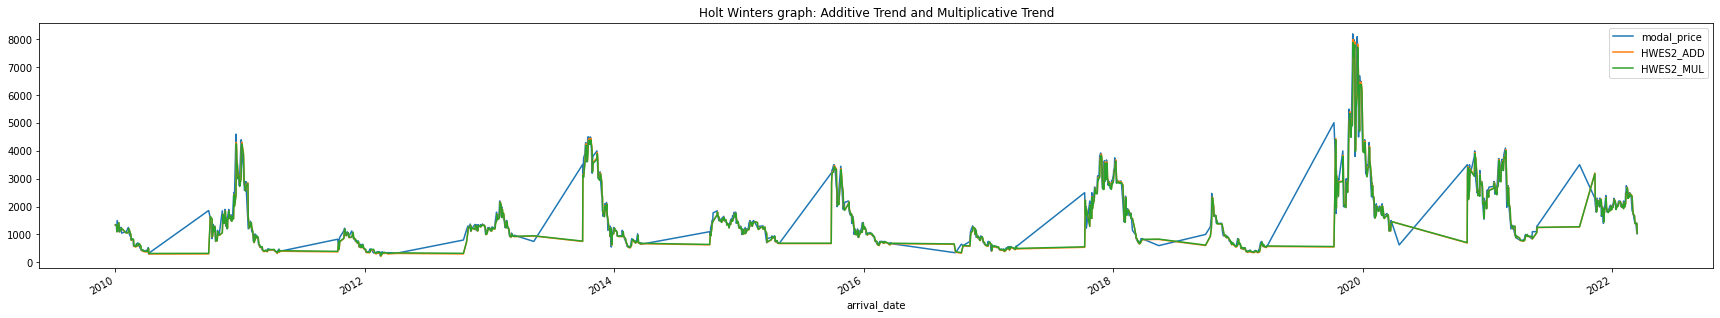

In [ ]:
df_modal['HWES2_ADD'] = ExponentialSmoothing(df_modal['modal_price'],trend='add').fit().fittedvalues
df_modal['HWES2_MUL'] = ExponentialSmoothing(df_modal['modal_price'],trend='mul').fit().fittedvalues
df_modal[['modal_price','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters graph: Additive Trend and Multiplicative Trend',figsize=[30,5])

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<AxesSubplot:title={'center':'Holt Winters graph: Additive Trend and Multiplicative Trend'}, xlabel='arrival_date'>

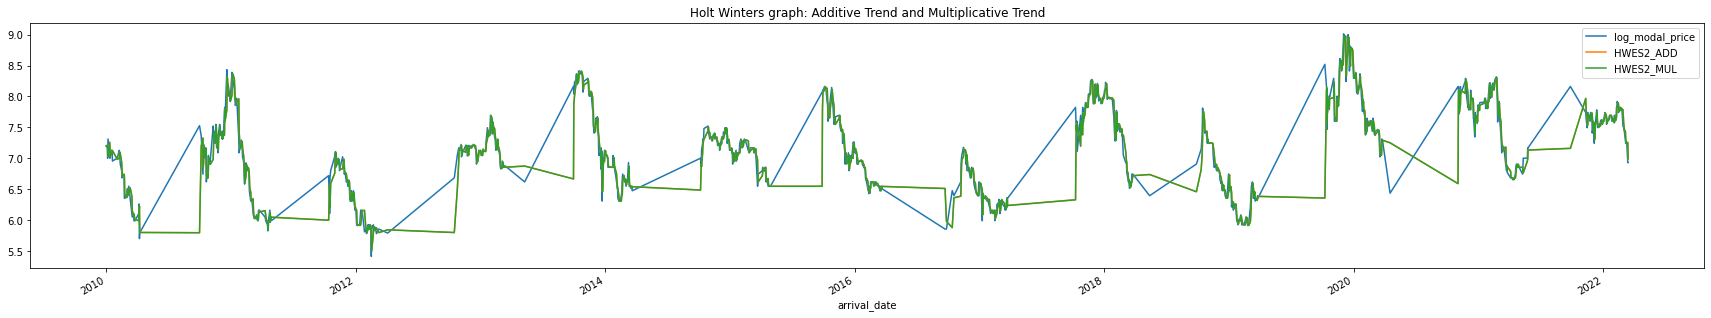

In [ ]:
df_modal['HWES2_ADD'] = ExponentialSmoothing(df_modal['log_modal_price'],trend='add').fit().fittedvalues
df_modal['HWES2_MUL'] = ExponentialSmoothing(df_modal['log_modal_price'],trend='mul').fit().fittedvalues
df_modal[['log_modal_price','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters graph: Additive Trend and Multiplicative Trend',figsize=[30,5])

In [ ]:
df_modal.head(2)

,modal_price,log_modal_price,timeindex,linear_price,HWES2_ADD,HWES2_MUL
arrival_date,,,,,,
2010-01-01,1350,7,0,860,7,7
2010-01-04,1300,7,3,861,7,7


In [ ]:
df_modal=df_modal.drop(['log_modal_price','timeindex','linear_price','HWES2_ADD','HWES2_MUL'],axis=1)

In [ ]:
df_modal

,modal_price
arrival_date,
2010-01-01,1350
2010-01-04,1300
2010-01-05,1100
2010-01-06,1500
2010-01-11,1250
...,...
2022-03-09,1425
2022-03-10,1400
2022-03-11,1425


In [ ]:
train_df_modal =df_modal[:-100]
test_df_modal = df_modal[-100:]

In [ ]:
model = ExponentialSmoothing(train_df_modal, seasonal_periods=200, trend='add', seasonal='mul')
fitted = model.fit()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
sales_forecast = fitted.forecast(steps=100)

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


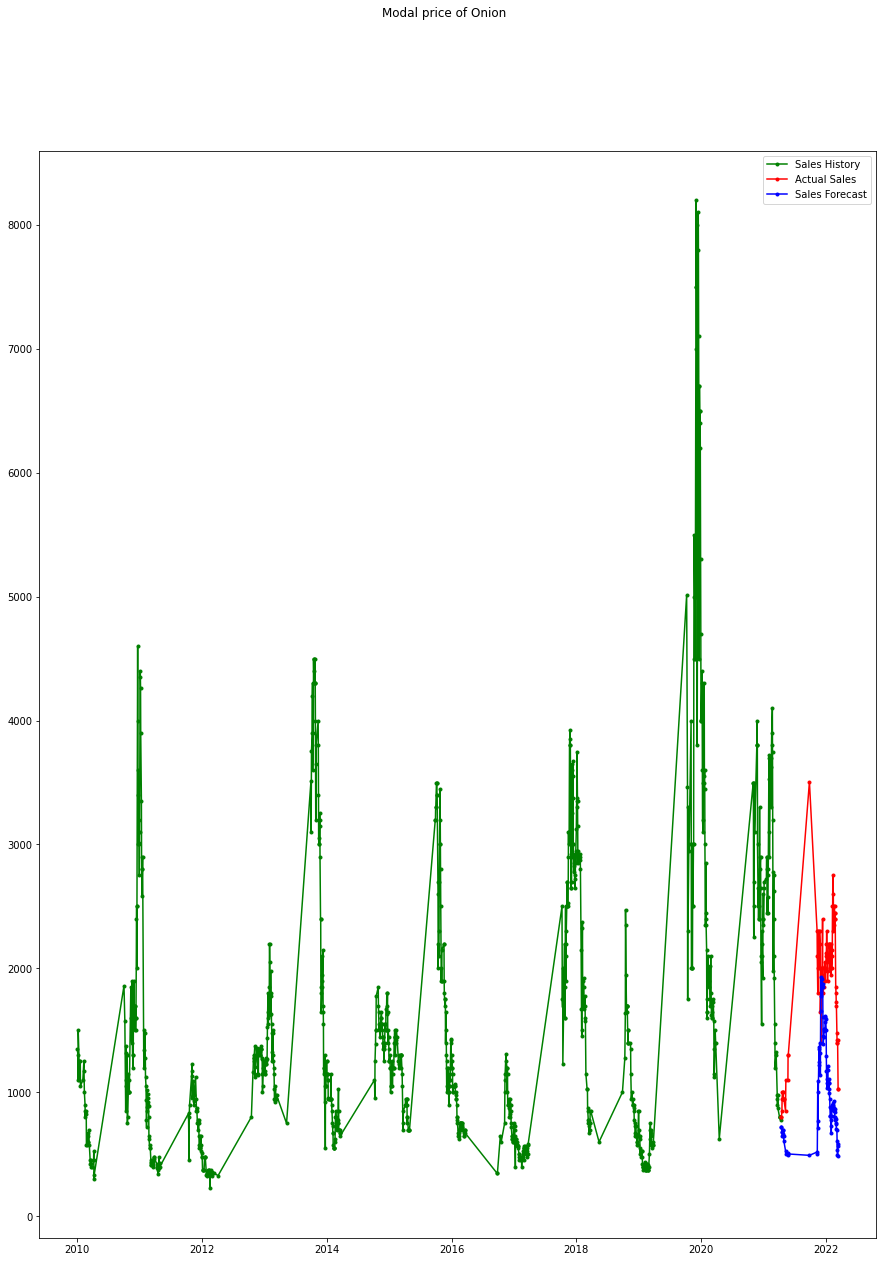

In [ ]:
fig = plt.figure()
fig.suptitle('Modal price of Onion')
past, = plt.plot(train_df_modal.index, train_df_modal, 'g.-', label='Sales History')
future, = plt.plot(test_df_modal.index, test_df_modal, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(test_df_modal.index, sales_forecast, 'b.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()